In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsf-datasets/student_scores.csv
/kaggle/input/tsf-datasets/matches.csv
/kaggle/input/tsf-datasets/deliveries.csv
/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv
/kaggle/input/tsf-datasets/india-news-headlines.csv
/kaggle/input/tsf-datasets/SampleSuperstore.csv
/kaggle/input/tsf-datasets/Iris.csv


<br>
<br>
<h2 style = "font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:10px;text-align:center; font-weight: bold" >IPL SPORTS ANALYSIS</h2> 
<br> 
<br>
<div class = 'image'> <img style="float:center; border:10px solid #fed049; width:90%" align=center src =
https://res.cloudinary.com/dofgyxd4y/image/upload/v1626834195/247-2478006_ipl-trophy-png-team_rgxiro.png> 
</div>
<br>
<br>
<a href ="https://res.cloudinary.com/dofgyxd4y/image/upload/v1626834195/247-2478006_ipl-trophy-png-team_rgxiro.png" style = "font-size:20px,color: dimgrey, text-align:left,font-family:serif"></a>
<br>

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)
print("all necessary libraries are imported")

all necessary libraries are imported


In [3]:
delv=pd.read_csv("../input/tsf-datasets/deliveries.csv")
mat=pd.read_csv("../input/tsf-datasets/matches.csv")

In [4]:
delv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
delv.shape,mat.shape

((179078, 21), (756, 18))

# **checking for the null values**

In [7]:
delv.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# **checking for unique features**

In [9]:
delv.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [10]:
mat.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [11]:
obj_col_delv=list(delv.select_dtypes(include="object").columns)
obj_col_delv

['batting_team',
 'bowling_team',
 'batsman',
 'non_striker',
 'bowler',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [12]:
num_col_delv=list(delv.select_dtypes(exclude="object").columns)
num_col_delv

['match_id',
 'inning',
 'over',
 'ball',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs']

In [13]:
obj_col_mat=list(mat.select_dtypes(include="object").columns)
obj_col_mat

['city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [14]:
num_col_mat=list(mat.select_dtypes(exclude="object").columns)
num_col_mat

['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets']

# **univariate analysis on deliveries**

<AxesSubplot:xlabel='inning', ylabel='count'>

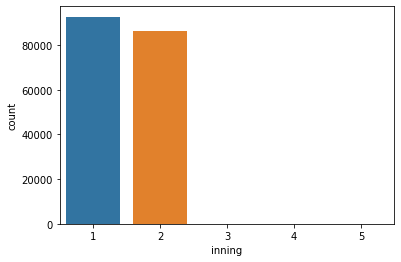

In [15]:
sns.countplot(delv['inning'])

> 1. This shows that only one and two innings present in the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Sunrisers Hyderabad'),
  Text(2, 0, 'Rising Pune Supergiant'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Kolkata Knight Riders'),
  Text(5, 0, 'Gujarat Lions'),
  Text(6, 0, 'Kings XI Punjab'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

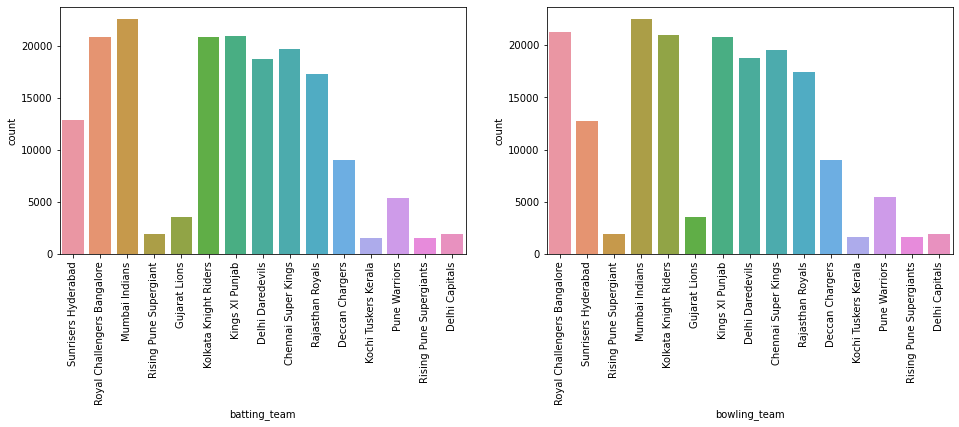

In [16]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.countplot(delv['batting_team'])
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot(delv['bowling_team'])
plt.xticks(rotation=90)

1. Mumbai Indians had performed batting and bowling most of the times.
2. Royal challengers banglore is the sec team to performed most batting and bowling
3. Kochi tuskers kerala had performed leat batting and bowling

<AxesSubplot:xlabel='over', ylabel='count'>

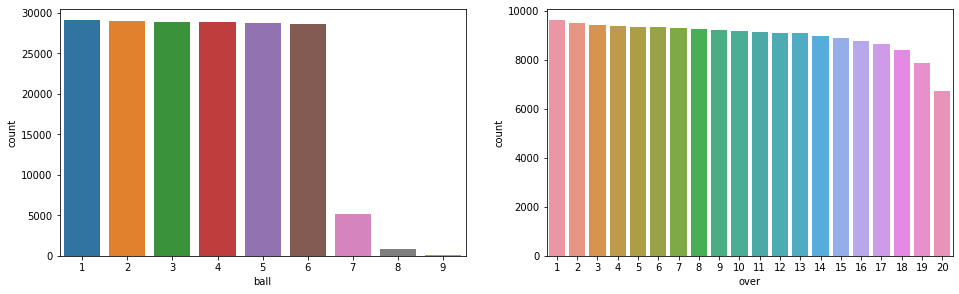

In [17]:
plt.figure(figsize=(16,10))
plt.subplot(223)
sns.countplot(delv['ball'])
plt.subplot(224)
sns.countplot(delv['over'])

<AxesSubplot:xlabel='legbye_runs', ylabel='count'>

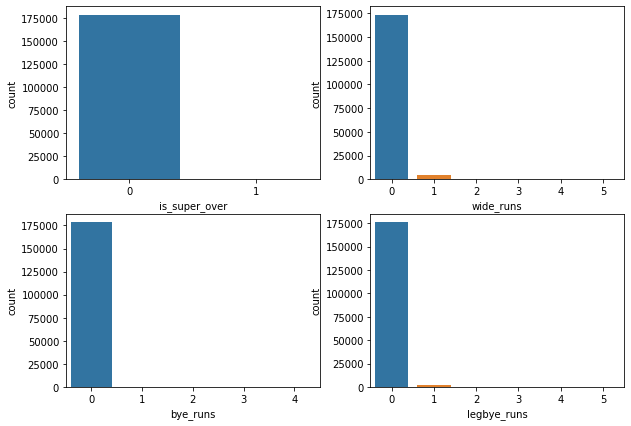

In [18]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(delv['is_super_over'])
plt.subplot(222)
sns.countplot(delv['wide_runs'])
plt.subplot(223)
sns.countplot(delv['bye_runs'])
plt.subplot(224)
sns.countplot(delv['legbye_runs'])

1. First figure shows that no over is a super over.
2. Second figure shows that very few runs are wide runs, most are not.
3. Third figure shows that no runs are bye-runs.
4. Fourth figure shows that legbye runs are negligble but still very few as comapre to no legbye runs.

<AxesSubplot:xlabel='extra_runs', ylabel='count'>

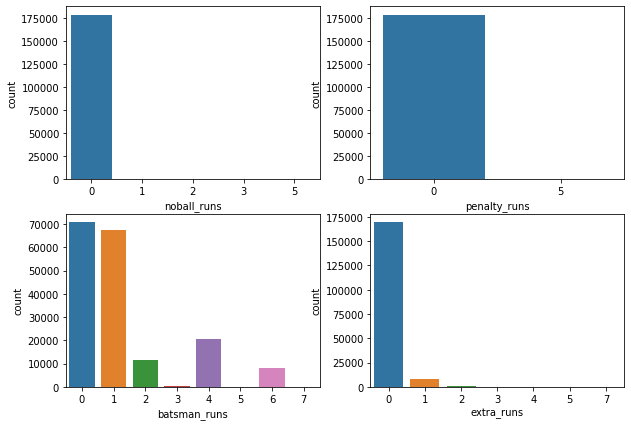

In [19]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(delv['noball_runs'])
plt.subplot(222)
sns.countplot(delv['penalty_runs'])
plt.subplot(223)
sns.countplot(delv['batsman_runs'])
plt.subplot(224)
sns.countplot(delv['extra_runs'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

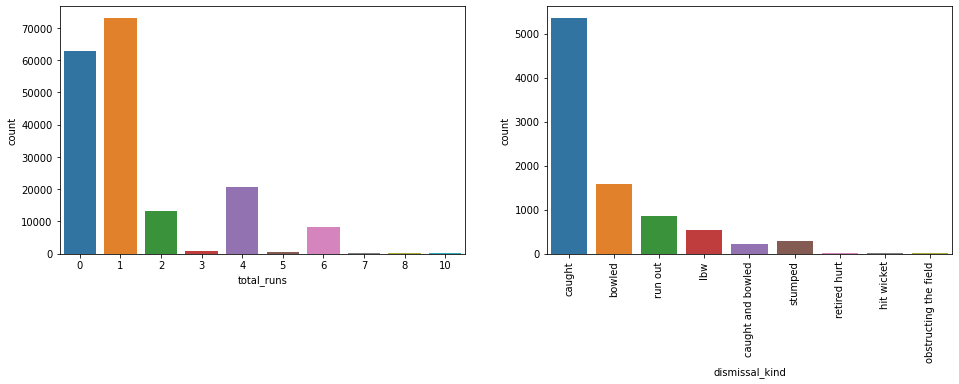

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.countplot(delv['total_runs'])
plt.subplot(222)
sns.countplot(delv['dismissal_kind'])
plt.xticks(rotation=90)

1. Most of the players were dismissed from the match due to caught.
2. very few player were dismiised due to retired hurt or hit wicket or by obstructing the field.

# univariate analysis on matches

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Delhi Daredevils'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Chennai Super Kings'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

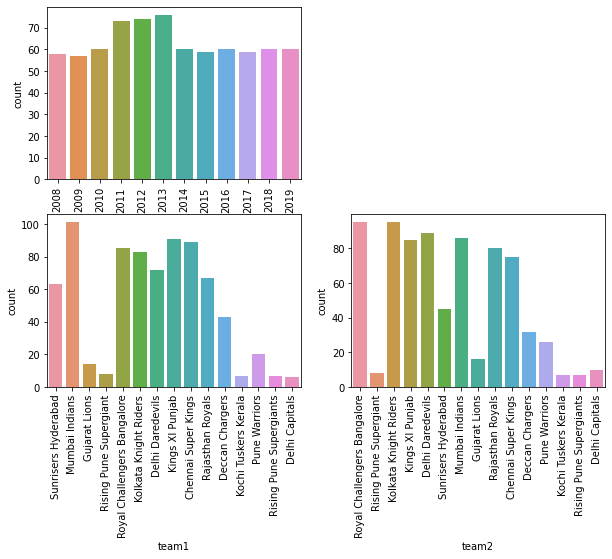

In [21]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(mat['season'])
plt.xticks(rotation=90)
plt.subplot(223)
sns.countplot(mat['team1'])
plt.xticks(rotation=90)
plt.subplot(224)
sns.countplot(mat['team2'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

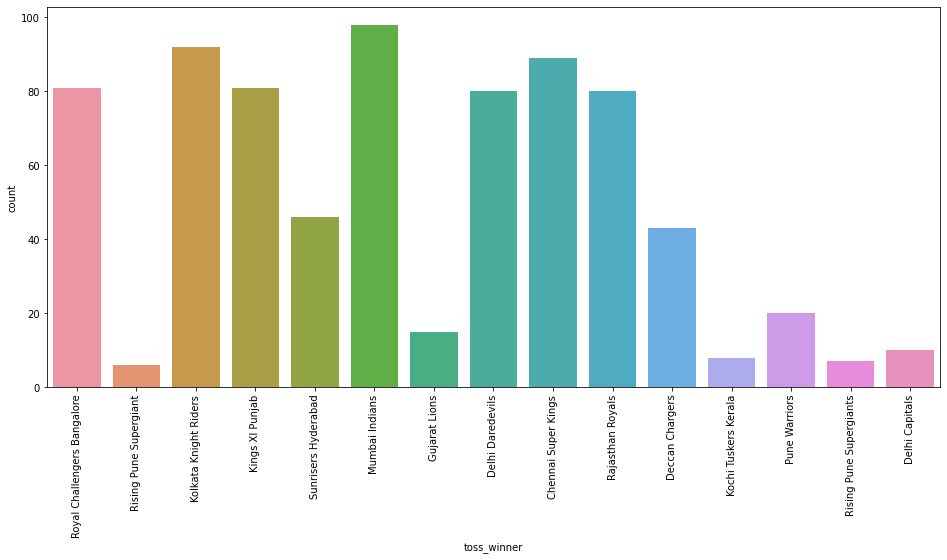

In [22]:
plt.figure(figsize=(16,7))
sns.countplot(mat['toss_winner'])
plt.xticks(rotation=90)

1. Mumbai indians had won the toss most of the times
2. The second most toss winning team is Kolkata Knight Riders
3. Rising pune supergiant is the team with leat toss winning record.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

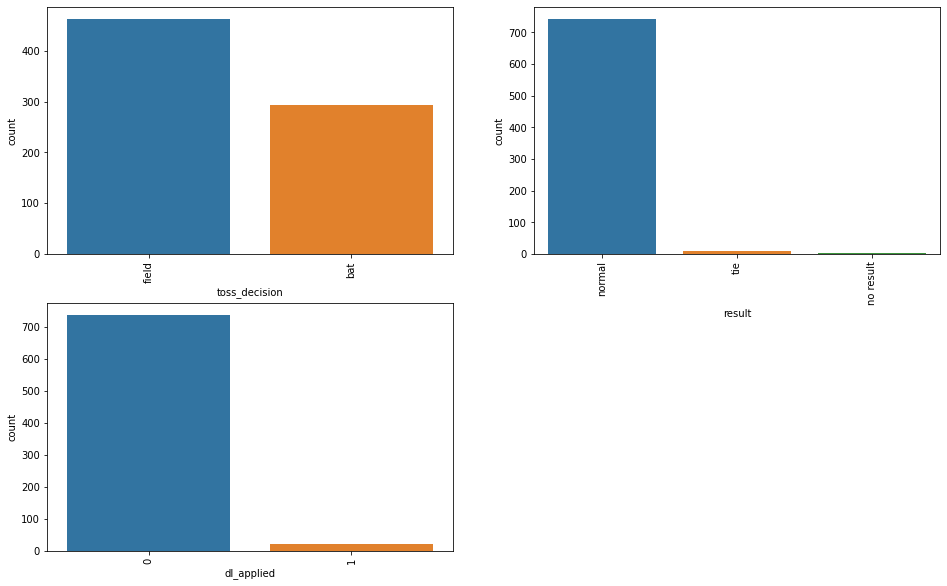

In [23]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.countplot(mat['toss_decision'])
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot(mat['result'])
plt.xticks(rotation=90)
plt.subplot(223)
sns.countplot(mat['dl_applied'])
plt.xticks(rotation=90)

1. Most of the teams who had won the toss decided to field.
2. Most of the matches result is normal that is one of the team has one and other loss.
3. very few matches records are their whose result is no result or tie.
4. In very few matches approx 40-50 , dl rule was applied but more than 700 matches were normal.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

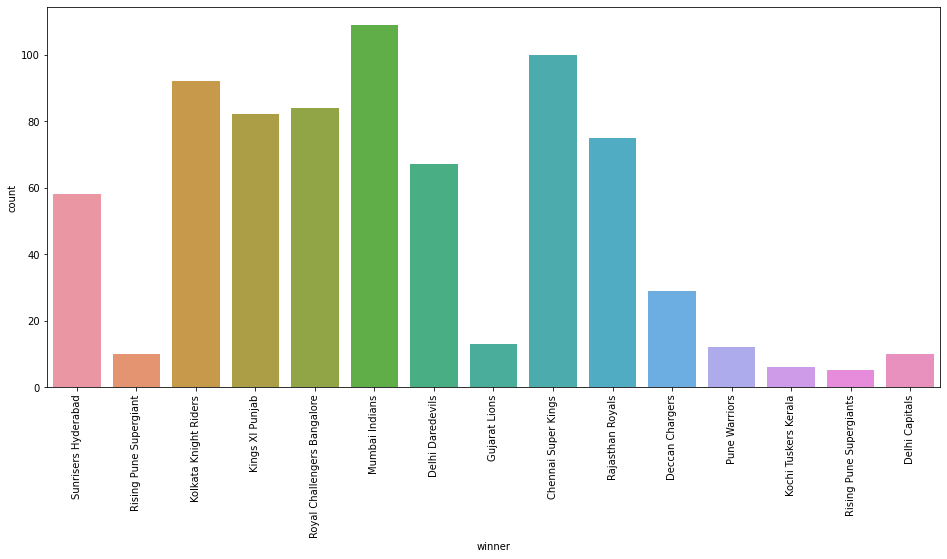

In [24]:
plt.figure(figsize=(16,7))
sns.countplot(mat['winner'])
plt.xticks(rotation=90)

1. Mumbai Indians is the team who has won the match most of the times henced ranked one as winne.
2. The second most winning team is Chennai Super kings.
3. Kolkata Knight Riders is the third most winning team.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

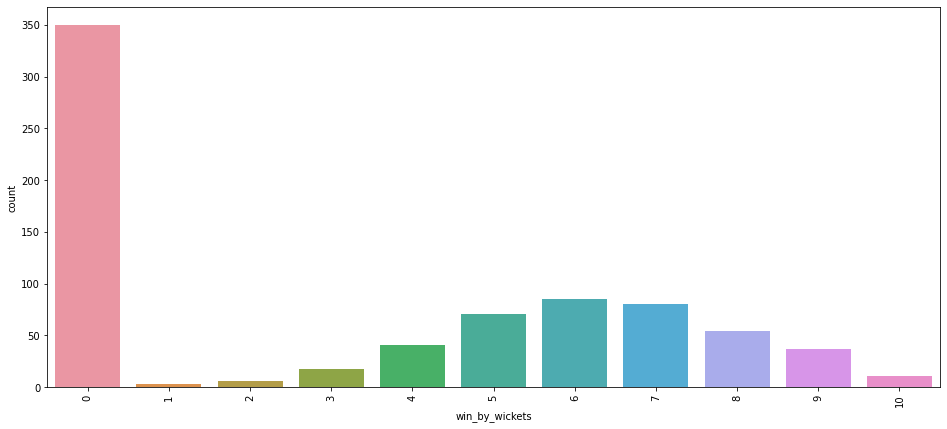

In [25]:
plt.figure(figsize=(16,7))
sns.countplot(mat['win_by_wickets'])
plt.xticks(rotation=90)

1. Most of the teams are win by no wickets.
2. Some teams has won by 6 wickets that is the second most wickets by a team has win after 0.
3. very few teams has won by 1 wicket.

# **Bivariate Analysis on deliveries set**

In [26]:
import plotly.express as pe
fig = pe.treemap(delv, path=['batting_team'], values='over',title="batting teams vs overs")
fig.show()

In [27]:
fig = pe.treemap(delv, path=['bowling_team'], values='ball',title="bowling teams vs balls")
fig.show()

In [28]:
fig = pe.treemap(delv, path=['batting_team'], values='inning',title="batting teams vs innings")
fig.show()

In [29]:
fig = pe.treemap(delv, path=['batting_team'], values='wide_runs',title="batting teams vs wide_runs")
fig.show()

In [30]:
fig = pe.treemap(delv, path=['batting_team'], values='legbye_runs',title="batting teams vs legbye_runs")
fig.show()

In [31]:
fig = pe.treemap(delv, path=['batting_team'], values='noball_runs',title="batting teams vs noball_runs")
fig.show()

In [32]:
fig = pe.treemap(delv, path=['batting_team'], values='penalty_runs',title="batting teams vs penalty_runs")
fig.show()

In [33]:
fig = pe.treemap(delv, path=['batting_team'], values='batsman_runs',title="batting teams vs batsman runs")
fig.show()

<!-- Bivariate Analysis on the Matches -->

# **Bivariate analysis on matches**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

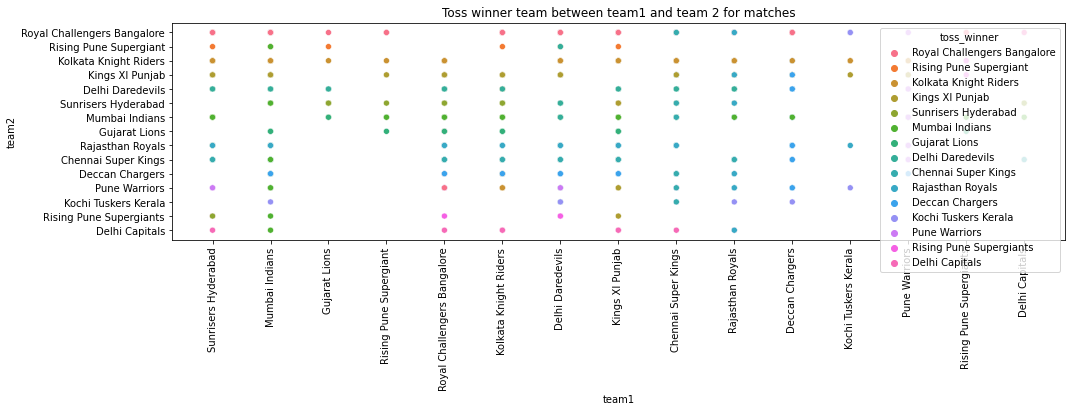

In [34]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='team1',y='team2',hue='toss_winner',data=mat)
plt.title("Toss winner team between team1 and team 2 for matches")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Mumbai Indians'),
  Text(2, 0, 'Gujarat Lions'),
  Text(3, 0, 'Rising Pune Supergiant'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Kolkata Knight Riders'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Kings XI Punjab'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

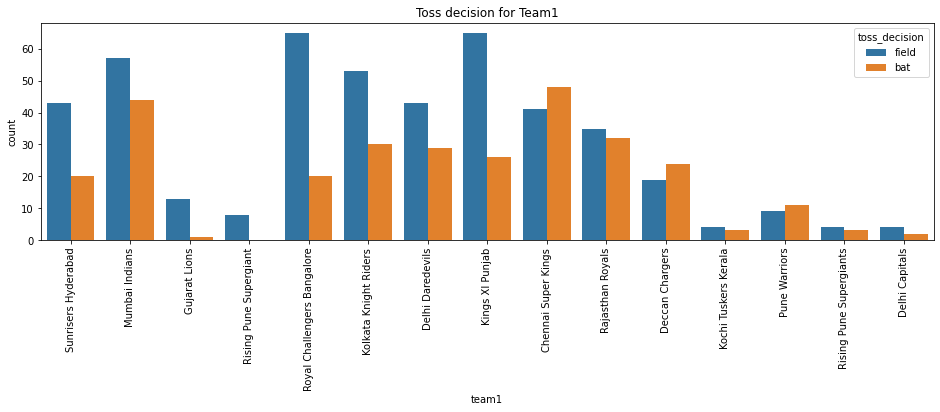

In [35]:
plt.figure(figsize=(16,4))
plt.title("Toss decision for Team1")
sns.countplot(data=mat,x='team1',hue='toss_decision')
plt.xticks(rotation=90)

In team 1 after winning the toss only "CHENNAI SUPER KINGS" and "RISING PUNE SUPERGIANTS" and "DECCAN CHARGERS" decided to bat first, Rest teams after winning the toss decided to field.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Delhi Daredevils'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Chennai Super Kings'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

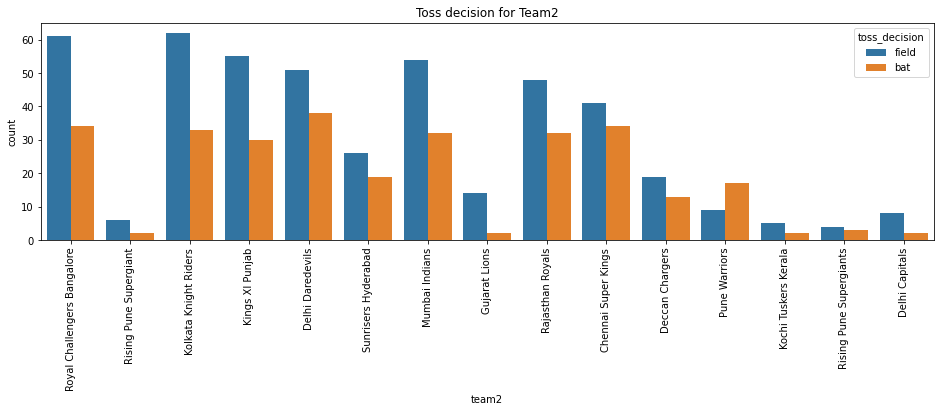

In [36]:
plt.figure(figsize=(16,4))
plt.title("Toss decision for Team2")
sns.countplot(data=mat,x='team2',hue='toss_decision')
plt.xticks(rotation=90)

In team to only "PUNE WARRIORS" decided to bat first after winning the toss whereas rest teams decided to field first.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Mumbai Indians'),
  Text(2, 0, 'Gujarat Lions'),
  Text(3, 0, 'Rising Pune Supergiant'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Kolkata Knight Riders'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Kings XI Punjab'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

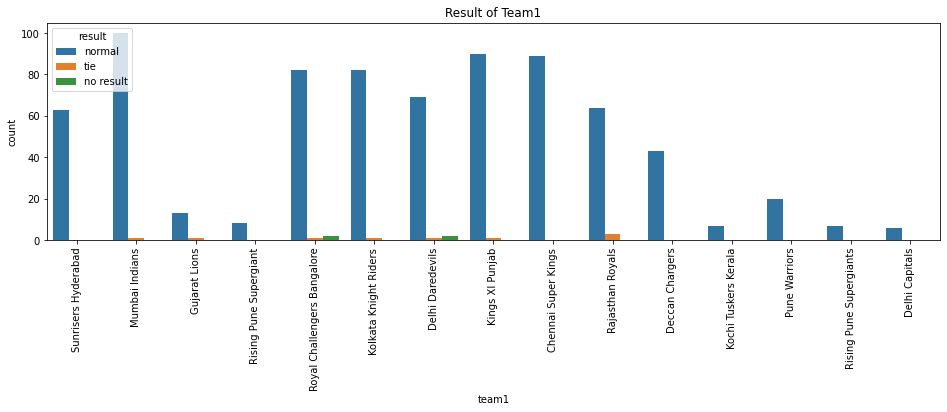

In [37]:
plt.figure(figsize=(16,4))
plt.title("Result of Team1")
sns.countplot(data=mat,x='team1',hue='result')
plt.xticks(rotation=90)

1. More than any other team, matches played by Rajasthan Royals having more tie matches.
2. Only matches played by "ROYAL CHALLENGERS BANGLORE"and "DELHI DAREDEVILS" teams lead to no result condition.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Delhi Daredevils'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Chennai Super Kings'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

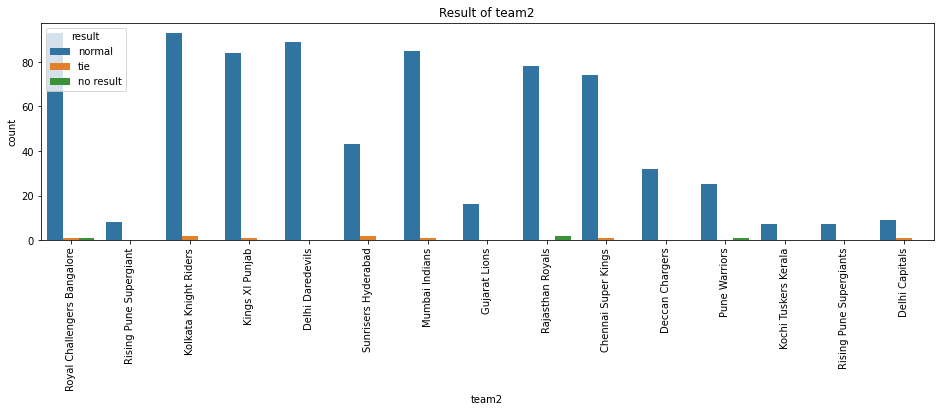

In [38]:
plt.figure(figsize=(16,4))
plt.title("Result of team2")
sns.countplot(data=mat,x='team2',hue='result')
plt.xticks(rotation=90)

1. More than any other team, matches played by "KOLKATA KNIGHT RIDERS" and "SUNRISERS HYDERABAD" having more tie matches.
2. Only matches played by "ROYAL CHALLENGERS BANGLORE"and "RAJASTHAN ROYALS" and "PUNE WARRIORS" teams lead to no result condition.